# Imports

In [ ]:
from tensorflow.keras import layers, models
from keras.applications.vgg16 import VGG16
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

# Create the model
- Recreate the model architecture in order to load the pre-trained weights

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dense_layer_2 = layers.Dense(256, activation='relu')
dropout_layer_1 = layers.Dropout(0.5)
dense_layer_3 = layers.Dense(128, activation='relu')
dense_layer_4 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dropout_layer_1,
    dense_layer_3,
    dense_layer_4,
    prediction_layer
])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               12845568  
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)               

# Load the weights

In [ ]:
model.load_weights("/content/drive/MyDrive/Git/newmodel.weights.h5")

In [ ]:
model.input_shape

(None, 224, 224, 3)

# Prepare the fresh data for inferencing

In [ ]:
predict_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
new_data_dir = '/content/drive/MyDrive/Git/NewData'

predict_generator = predict_datagen.flow_from_directory(
    new_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.


# Prediction

In [ ]:
results = model.predict(predict_generator)

63/63 [==============================] - 632s 10s/step


In [ ]:
results

array([[5.5014014e-01, 4.4985986e-01],
       [7.7842158e-01, 2.2157842e-01],
       [6.5431923e-01, 3.4568077e-01],
       ...,
       [2.3745617e-03, 9.9762541e-01],
       [4.1659712e-04, 9.9958342e-01],
       [8.0118724e-04, 9.9919885e-01]], dtype=float32)

# Confusion Matrix

In [ ]:
true_labels = np.array([0] * 1000 + [1] * 1000)

In [ ]:
true_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
predicted_labels = np.array([0 if pred[0] > pred[1] else 1 for pred in results])
predicted_labels

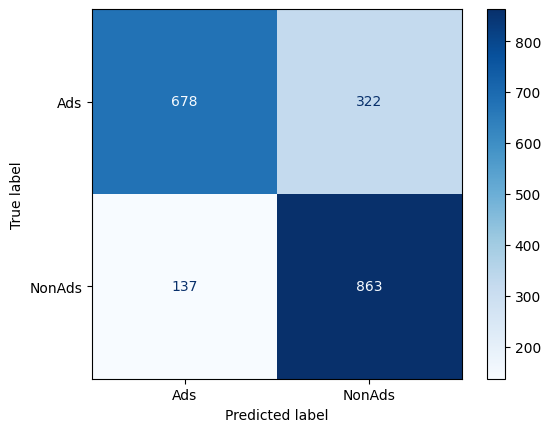

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ads", "NonAds"])
disp.plot(cmap='Blues')

# Precision, Recall, f1 and Accuracy

In [ ]:
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.7283
Recall: 0.8630
F1 Score: 0.7899
Accuracy: 0.7705


# For prediction on a single directory of data.

In [ ]:
import pandas as pd

new_data_dir = '/content/drive/MyDrive/Git/NewData/NonAds'

image_files = [f for f in os.listdir(new_data_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

df = pd.DataFrame({'filename': image_files})

predict_generator = predict_datagen.flow_from_dataframe(
    dataframe=df,
    directory=new_data_dir,
    x_col='filename',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 1000 validated image filenames.


In [ ]:
predictions = model.predict(predict_generator)
results = {image_file: prediction for image_file, prediction in zip(predict_generator.filenames, predictions)}

for image_file, prediction in results.items():
    print(f"Prediction for image {image_file}: {prediction}")

32/32 [==============================] - 34s 961ms/step
Prediction for image 03094.png: [0.12382305 0.8761769 ]
Prediction for image 03347.png: [0.55332315 0.44667688]
Prediction for image 03839.png: [0.22014065 0.7798593 ]
Prediction for image 01724.png: [0.18069686 0.81930315]
Prediction for image 02635.png: [0.57644534 0.4235547 ]
Prediction for image 03445.png: [0.0036333  0.99636674]
Prediction for image 05507.png: [0.2977779 0.7022221]
Prediction for image 07329.png: [0.13250376 0.86749625]
Prediction for image 04987.png: [0.6506814  0.34931856]
Prediction for image 02923.png: [0.00124501 0.998755  ]
Prediction for image 06373.png: [0.07368755 0.9263125 ]
Prediction for image 04907.png: [0.00505231 0.9949477 ]
Prediction for image 07453.png: [0.13299249 0.8670075 ]
Prediction for image 02096.png: [0.00287513 0.99712485]
Prediction for image 04167.png: [9.4776004e-07 9.9999905e-01]
Prediction for image 03329.png: [0.02151969 0.97848034]
Prediction for image 05560.png: [0.55780876 